# Differenze fra gli anni

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.miscellanea_utils import find_matlabstyle
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

from covid_lib import find_day_index

## Lettura dati

In [2]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

giorni_label=np.array([g[0:10] for g in giorni])

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 663
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2021-12-17T17:00:00


In [3]:
start_day='05-01'
end_day='12-17'

extra_day='12-31'

first_index_20=find_day_index(giorni,'2020-'+start_day)[0]
last_index_20=find_day_index(giorni,'2020-'+end_day)[0]
extra_index_20=find_day_index(giorni,'2020-'+extra_day)[0]

first_index_21=find_day_index(giorni,'2021-'+start_day)[0]
last_index_21=find_day_index(giorni,'2021-'+end_day)[0]




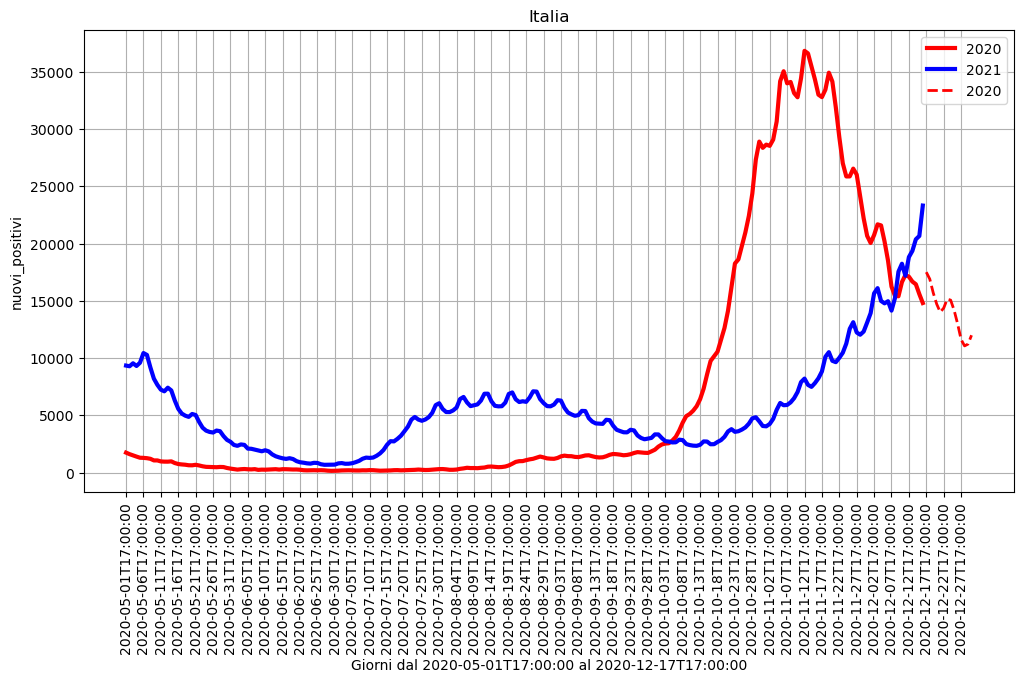

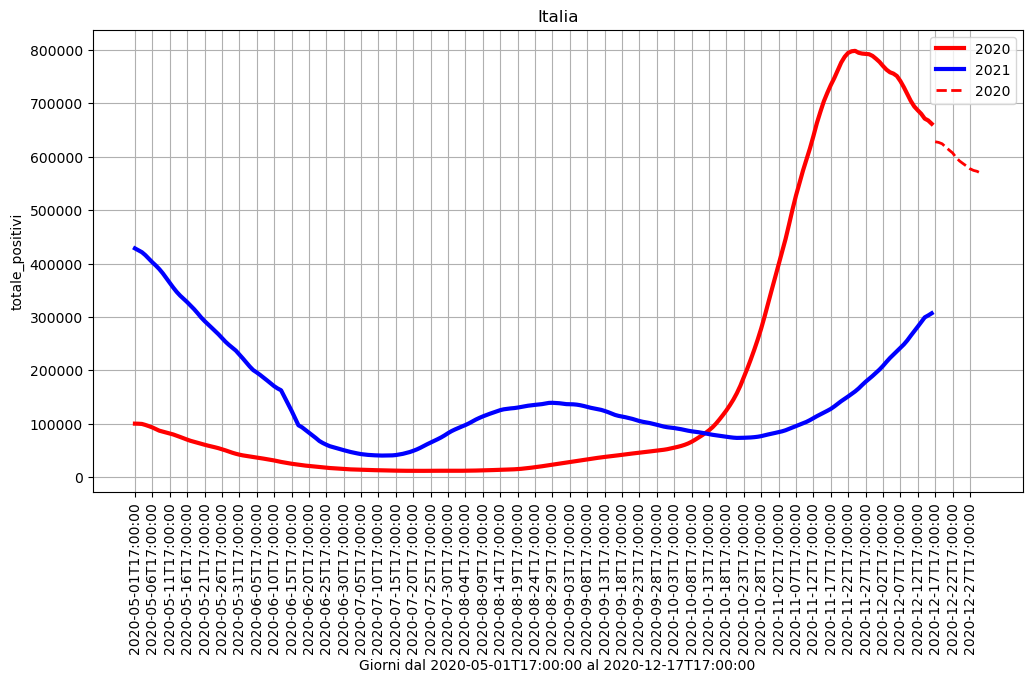

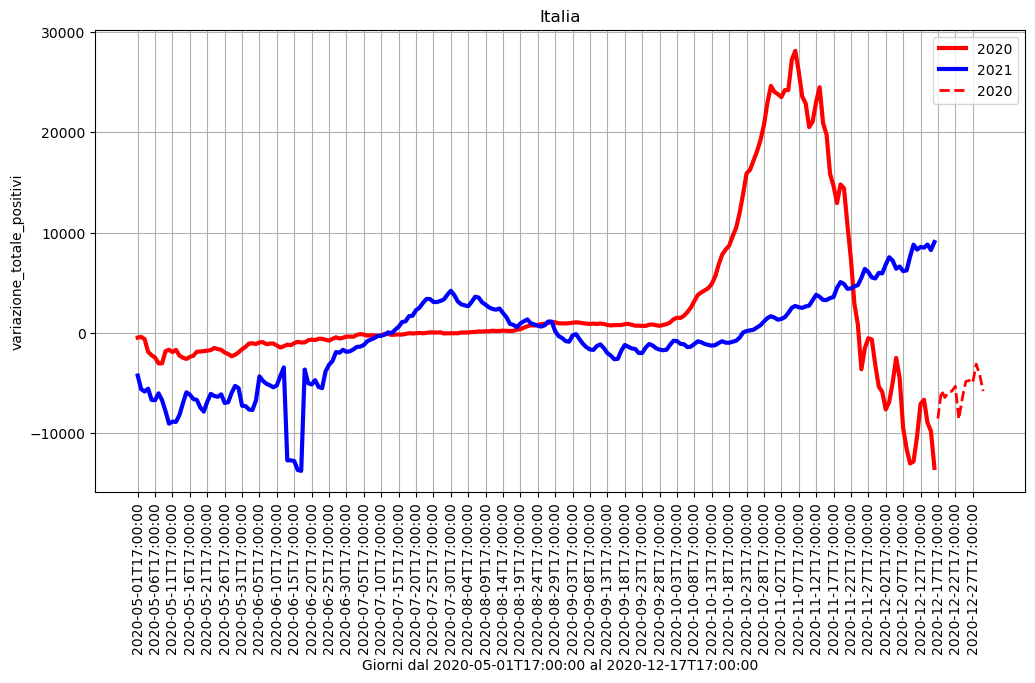

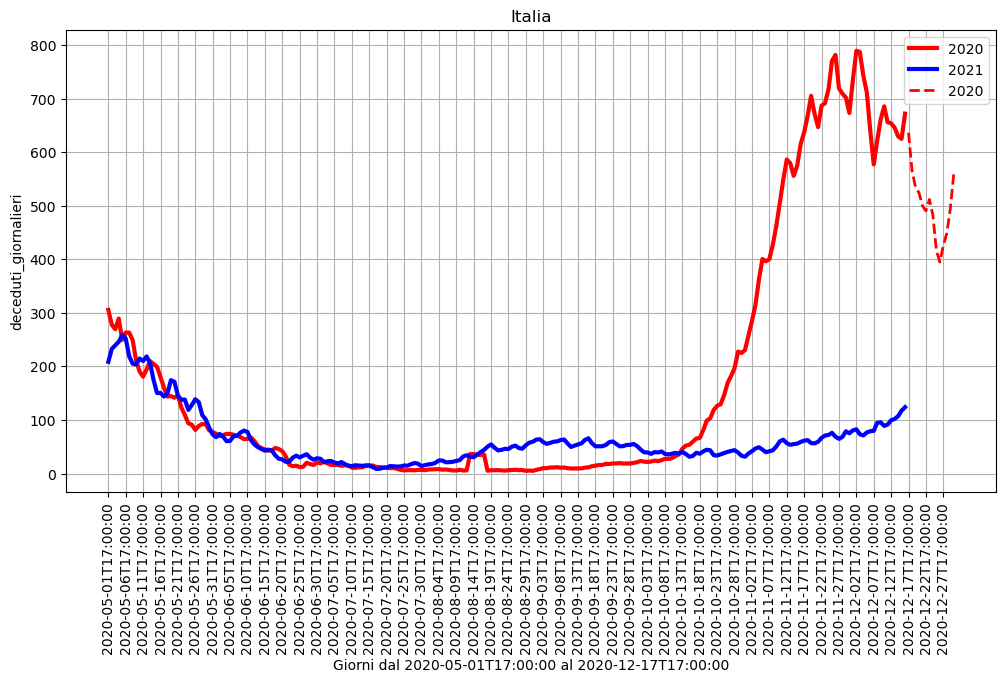

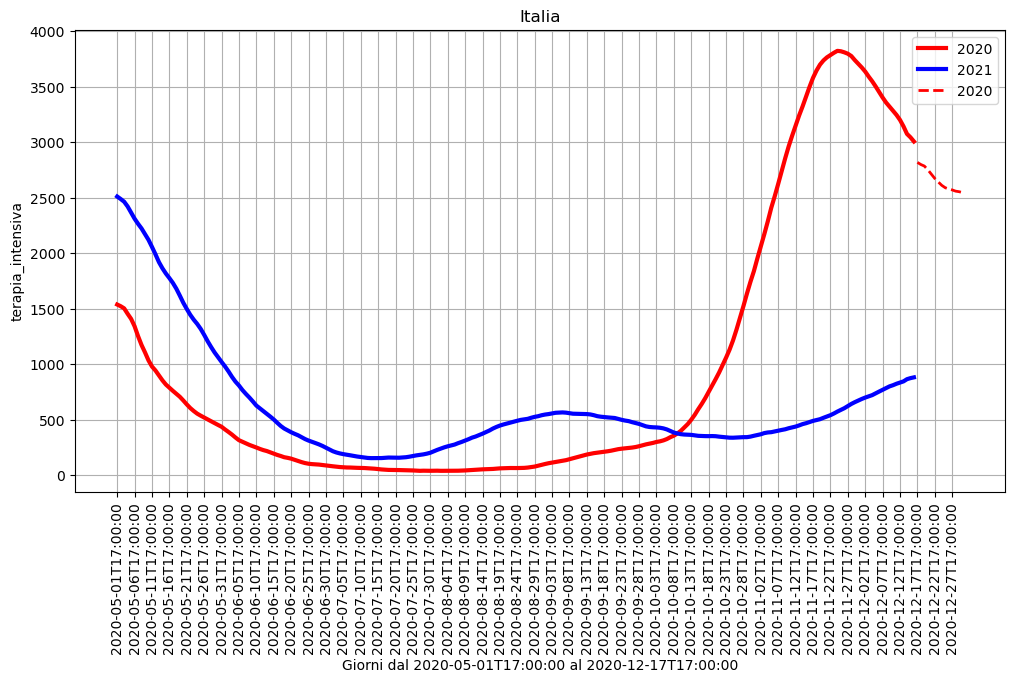

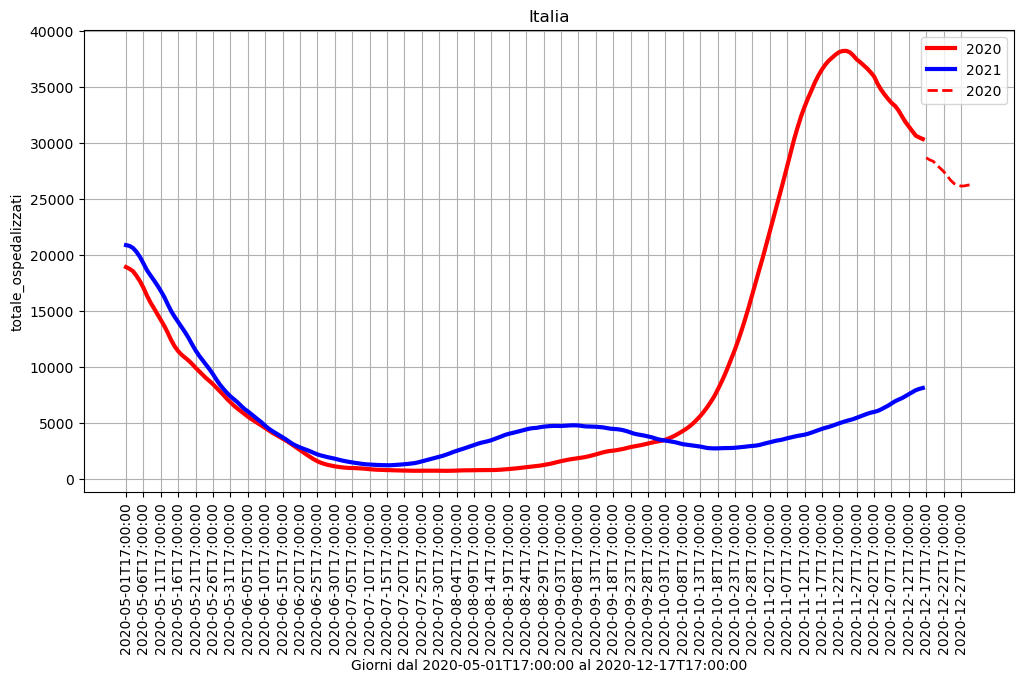

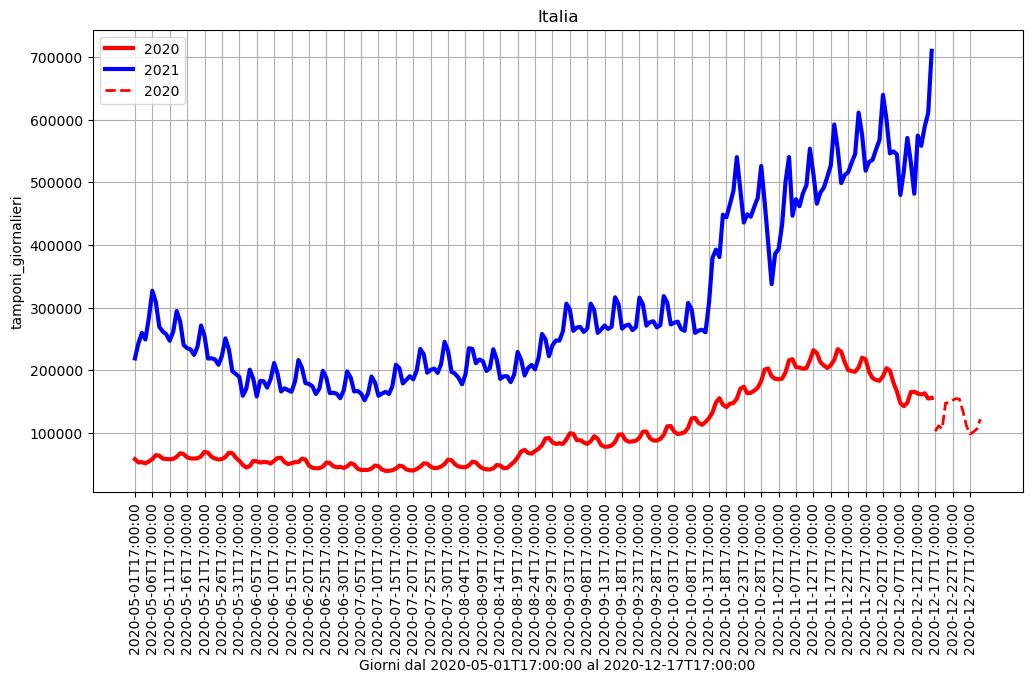

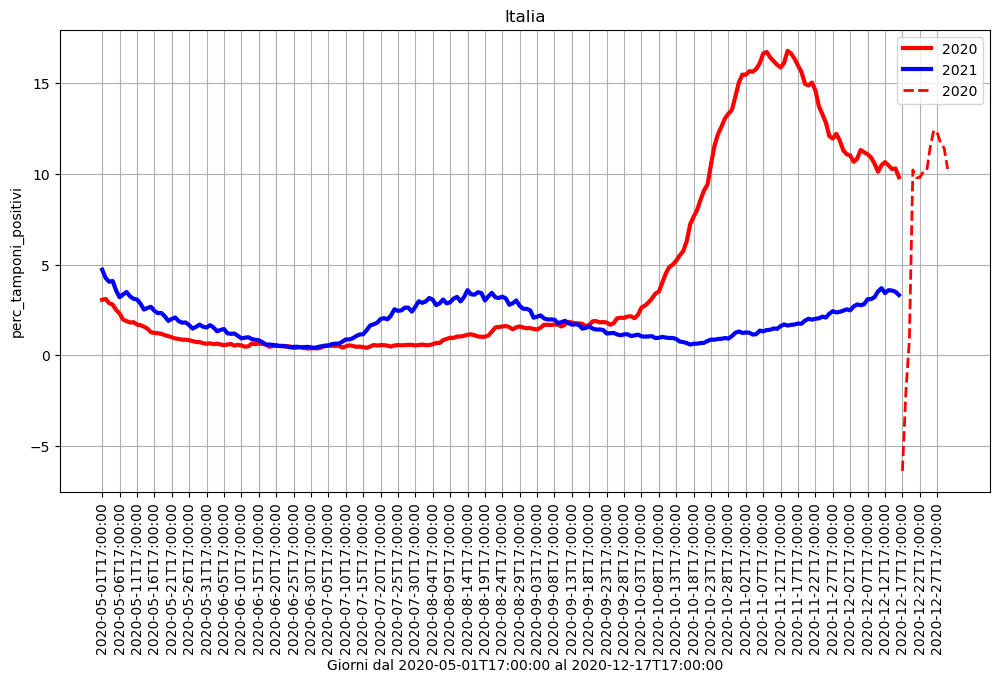

In [4]:
figsize_single=(12,6)

regione='Italia'

indicatori_selected=['nuovi_positivi',
                    'totale_positivi',
                    'variazione_totale_positivi',
                    'deceduti_giornalieri',
                    'terapia_intensiva',
                    'totale_ospedalizzati',
                    'tamponi_giornalieri',
                    'perc_tamponi_positivi']

#indicatori_selected=['nuovi_positivi']


for indicatore in indicatori_selected:
    fig,ax=plt.subplots(1,figsize=figsize_single)
   
    ax.plot(range(0,last_index_20-first_index_20),
            moving_function_rev1(trend[indicatore][regione][first_index_20:last_index_20],np.mean,2,2),
            label='2020',color='r',linewidth=3)
    ax.plot(range(0,last_index_20-first_index_20),
            moving_function_rev1(trend[indicatore][regione][first_index_21:last_index_21],np.mean,2,2),label='2021',
            color='b',linewidth=3)
    
    # extra days 2020
    ax.plot(range(last_index_20-first_index_20,extra_index_20-first_index_20),
            moving_function_rev1(trend[indicatore][regione][last_index_20:extra_index_20],np.mean,2,2),label='2020',
            color='r',linewidth=2,linestyle='--')
    
    
    ax.set_title(regione)
    ax.set_xlabel('Giorni dal %s al %s'%(giorni[first_index_20],giorni[last_index_20]))
    ax.set_ylabel(indicatore)
    ax.legend()
    ax.grid()
    
    #ax.set_xticks(list(range(0,last_index_20-first_index_20,5)))
    ax.set_xticks(list(range(0,extra_index_20-first_index_20,5)))
    ax.set_xticklabels(giorni[list(range(first_index_20,extra_index_20,5))],rotation=90)

plt.show()